In [ ]:
\\fs\SHARED\onderzoek\6. Marine Observation Center\Projects\IMAGINE\UC5\data\images_DS

\\fs\SHARED\onderzoek\6. Marine Observation Center\Projects\IMAGINE\UC5\data\dataset_files_DS

Actinoptychus/ecotaxa_Actinoptychus_8501C461-CAFC-40A9-9B91-EF6EAD9C1F89.jpg 0
Actinoptychus/ecotaxa_Actinoptychus_EFAF8020-F850-41E1-97DF-83C3DD60C318.jpg 0
Actinoptychus/ecotaxa_Actinoptychus_683C9831-456D-46A0-8AA8-964E79C648CB.jpg 0
Actinoptychus/ecotaxa_Actinoptychus_9ED2FD2F-6ED9-4F87-A5CC-4C36607E94DE.jpg 0
Actinoptychus/ecotaxa_Actinoptychus_E0CEDFB9-B27B-458B-BAAB-3BE2830CBBE9.jpg 0
Actinoptychus/ecotaxa_Actinoptychus_DD6EDBBA-C47F-4245-9F5F-B578F860F7C9.jpg 0
Actinoptychus/ecotaxa_Actinoptychus_CD8284C8-5C18-4C94-948F-7442380F94E8.jpg 0

# Concatenate the datasets
all_data = np.concatenate((X_train, X_test, X_val))

# Extract class names from file paths for all datasets
class_names_all = [path.split('/')[-2] for path in all_data]

# Count occurrences of each class for all datasets
class_counts_all = Counter(class_names_all)

# Extract class names and counts for all datasets
classes_all = list(class_counts_all.keys())
counts_all = list(class_counts_all.values())

# Plot histogram for all datasets combined
plt.figure(figsize=(20, 8))
plt.bar(classes_all, counts_all, color='skyblue')
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Total Class Distribution Histogram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plot histogram for each dataset separately
datasets = {'X_train': X_train, 'X_test': X_test, 'X_val': X_val}
for dataset_name, dataset in datasets.items():
    class_names = [path.split('/')[-2] for path in dataset]
    class_counts = Counter(class_names)
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(20, 8))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class Names')
    plt.ylabel('Frequency')
    plt.title(f'{dataset_name} Class Distribution Histogram')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

In [2]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Paths
base = r"\\fs\SHARED\onderzoek\6. Marine Observation Center\Projects\IMAGINE\UC5\data\dataset_files_DS"

train_file = f"{base}\\train.txt"
test_file  = f"{base}\\test.txt"
val_file   = f"{base}\\val.txt"

# Helper: read the first column (image paths)
def load_paths(file):
    with open(file, "r") as f:
        lines = f.readlines()
    return [line.strip().split()[0] for line in lines]   # take only path, ignore label
       
X_train = load_paths(train_file)
X_test  = load_paths(test_file)
X_val   = load_paths(val_file)


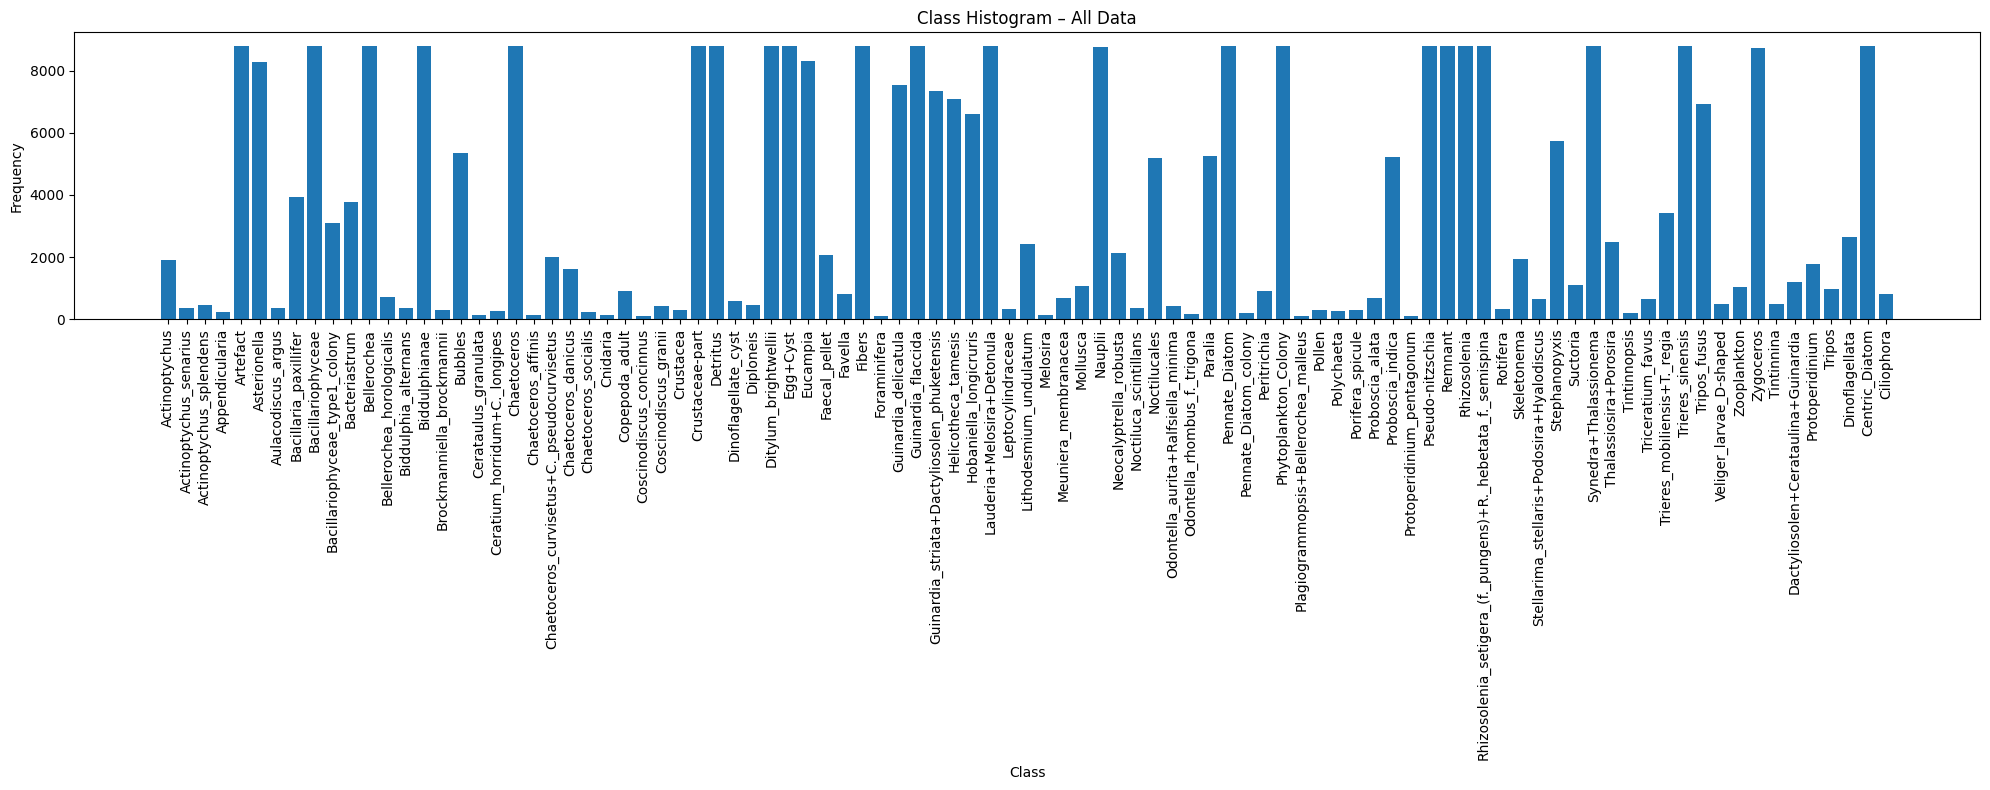

In [4]:
# Concatenate all datasets
all_data = np.concatenate((X_train, X_test, X_val))

# Extract class folder
class_names_all = [path.split('/')[0] for path in all_data]

# Count
class_counts_all = Counter(class_names_all)
classes_all = list(class_counts_all.keys())
counts_all = list(class_counts_all.values())

plt.figure(figsize=(20, 8))
plt.bar(classes_all, counts_all)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Histogram – All Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


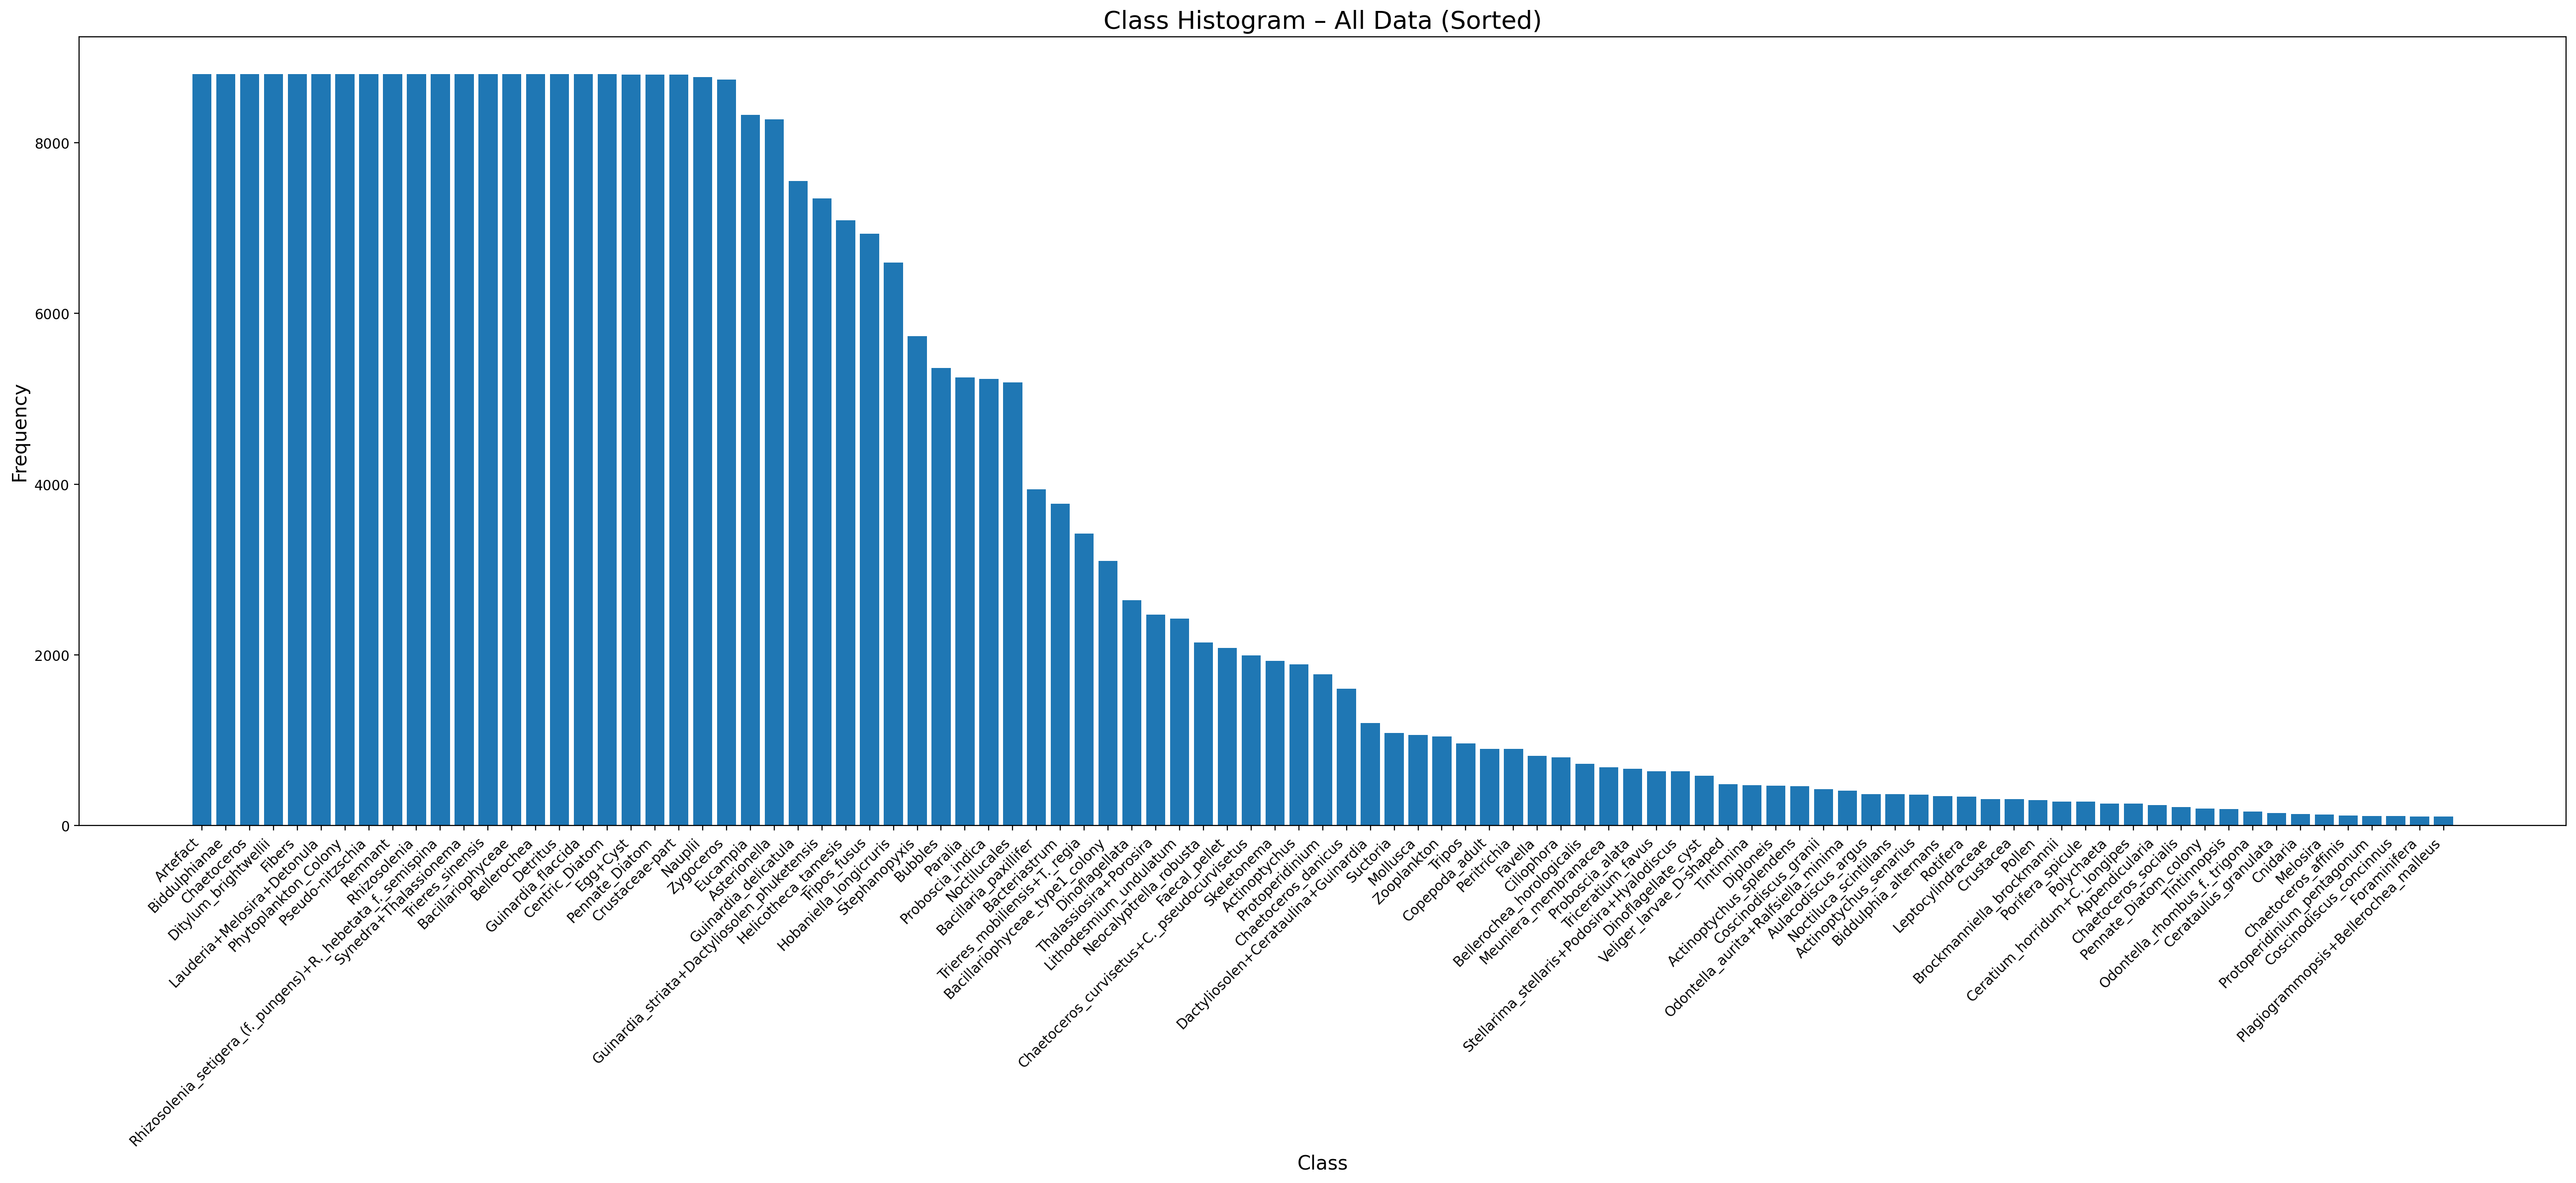

In [5]:
# Concatenate all datasets
all_data = np.concatenate((X_train, X_test, X_val))

# Extract class folder
class_names_all = [path.split('/')[0] for path in all_data]

# Count classes
class_counts_all = Counter(class_names_all)

# Sort by frequency (descending)
classes_all, counts_all = zip(*sorted(class_counts_all.items(), key=lambda x: x[1], reverse=True))

# High quality plot
plt.figure(figsize=(26, 12), dpi=200)  # bigger + higher resolution
plt.bar(classes_all, counts_all)

plt.xlabel('Class', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Class Histogram – All Data (Sorted)', fontsize=18)

plt.xticks(rotation=45, ha='right', fontsize=10)  # angled labels, more readable
plt.tight_layout()

plt.show()


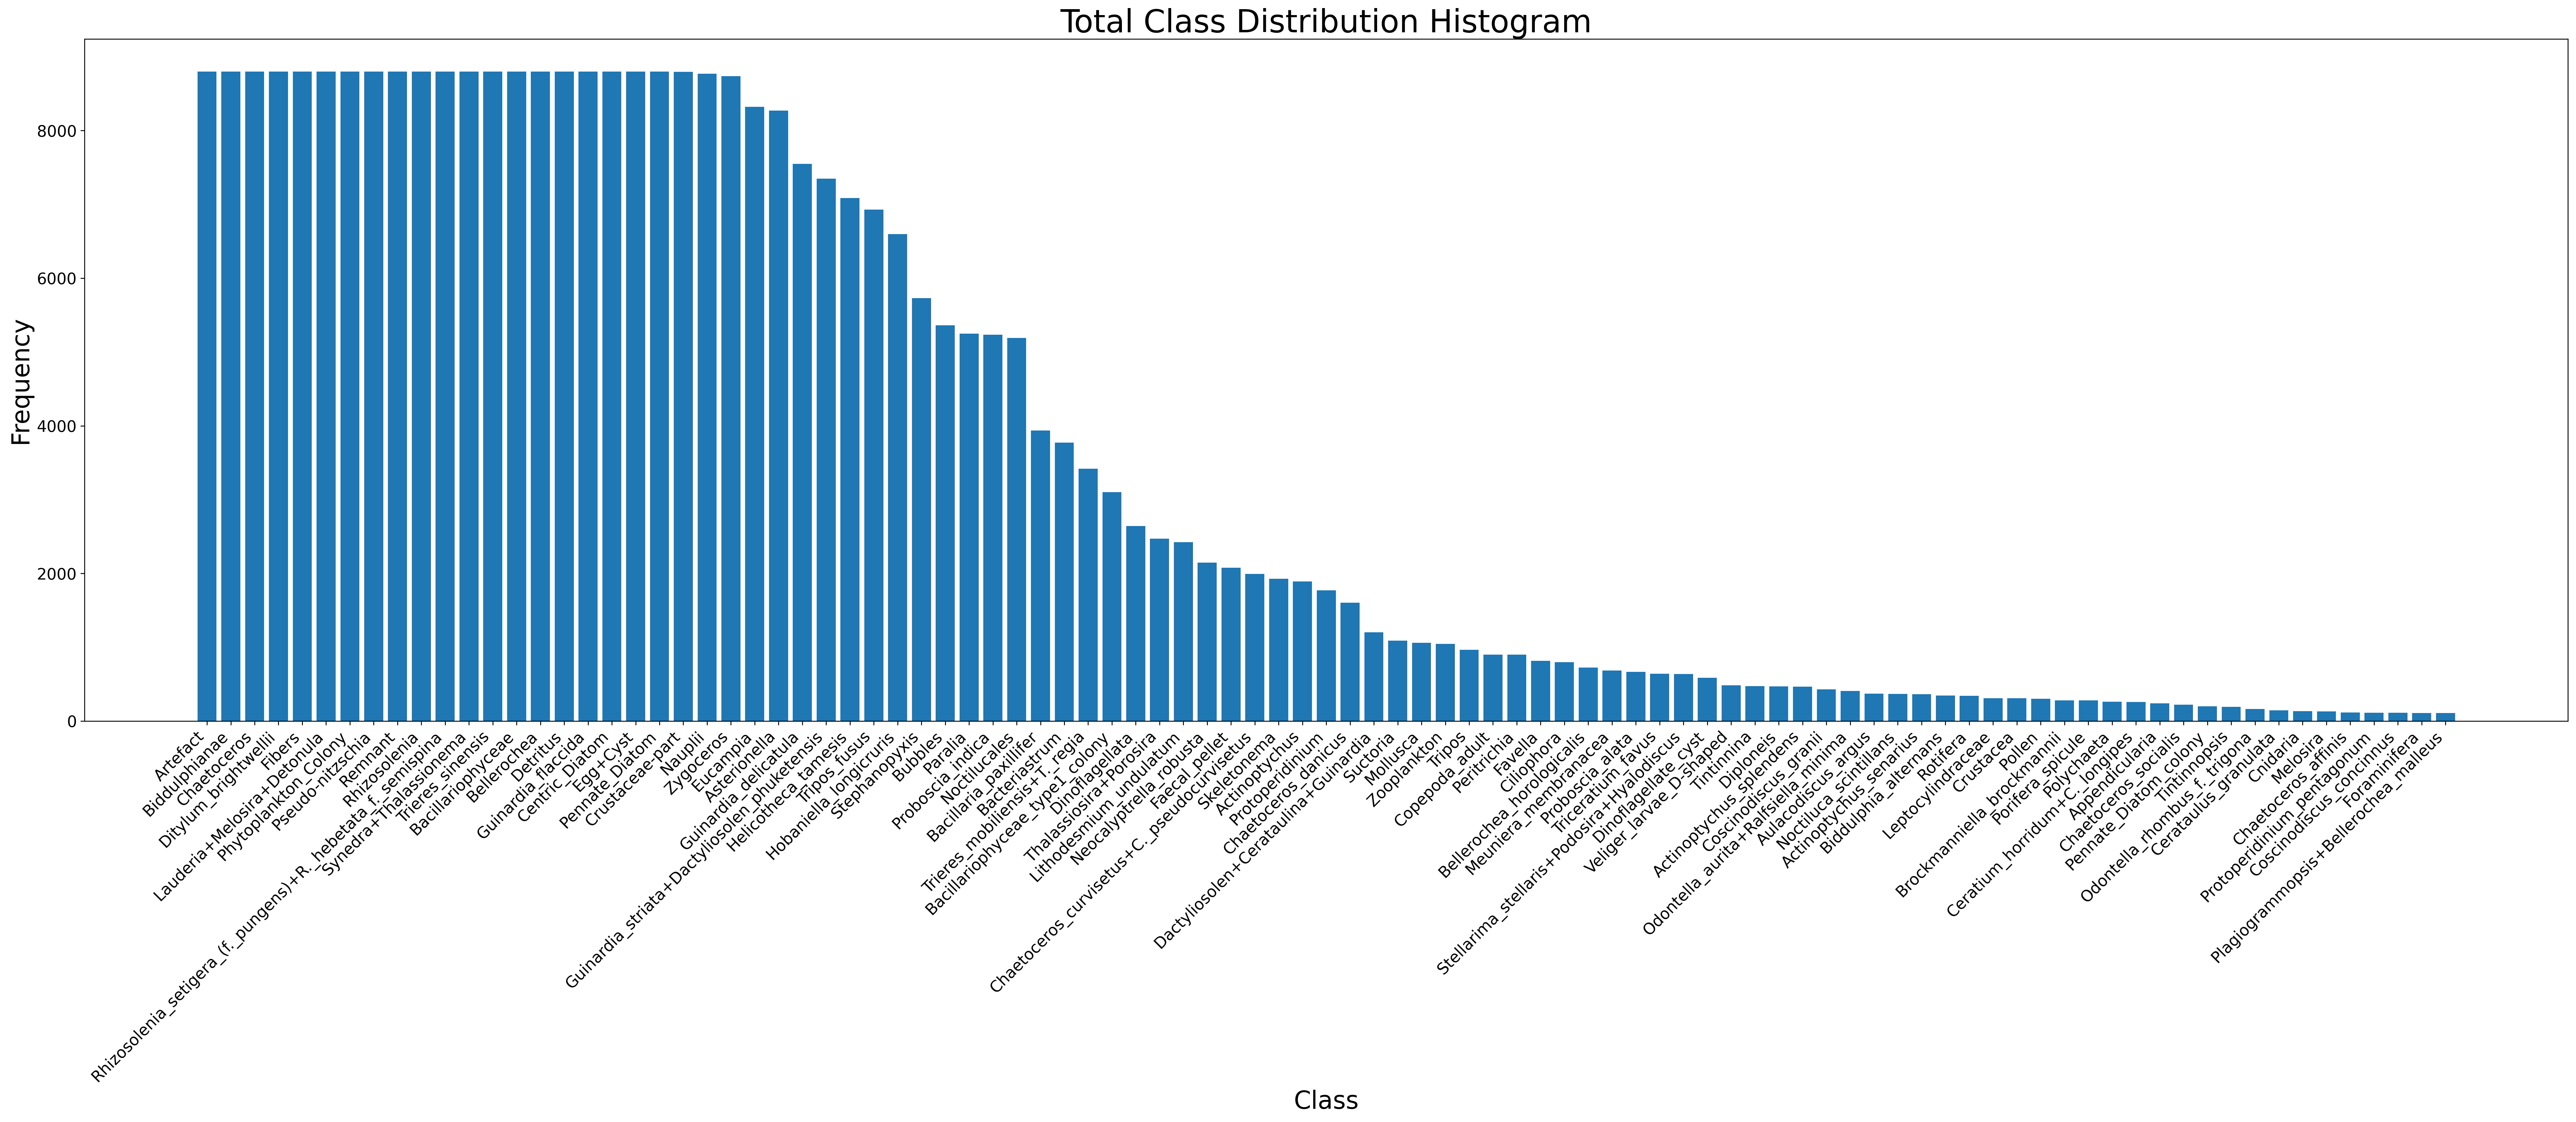

Exported: class_histogram_sorted.png and class_histogram_sorted.pdf


In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# ---- CONCAT + COUNT ----
all_data = np.concatenate((X_train, X_test, X_val))
class_names_all = [path.split('/')[0] for path in all_data]
class_counts_all = Counter(class_names_all)

# Sort by count (descending)
classes_all, counts_all = zip(
    *sorted(class_counts_all.items(), key=lambda x: x[1], reverse=True)
)

# ---- HIGH QUALITY FIGURE ----
plt.figure(figsize=(32, 14), dpi=300)  # extremely high quality export

plt.bar(classes_all, counts_all)

# BIG FONTS
plt.xlabel('Class', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.title('Total Class Distribution Histogram', fontsize=28)

# READABLE X-AXIS
plt.xticks(rotation=45, ha='right', fontsize=14)

plt.yticks(fontsize=14)

plt.tight_layout()

# ---- EXPORT ----
plt.savefig("class_histogram_sorted.png", dpi=300, bbox_inches='tight')
plt.savefig("class_histogram_sorted.pdf", dpi=300, bbox_inches='tight')  # vector quality

plt.show()

print("Exported: class_histogram_sorted.png and class_histogram_sorted.pdf")
